# Analyse graphique des données (EDA)

## 1. Charger les données et explorer les premières lignes

Nous allons d'abord charger le fichier CSV et examiner les premières lignes pour nous familiariser avec la structure des données.

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd

# Charger les données avec des valeurs spécifiques interprétées comme "NaN"
data = pd.read_csv('./data/prix_maisons.csv', na_values=['', ' ', 'NaN', 'N/A', '-'])

# Aperçu des premières lignes des données
data.head()

,date,surface,nombre_pieces,nombre_salles_bain,nombre_etages,age_maison,type_chauffage,quartier,proximite_ecole,prix
0,2020-08-16,152,7,1,1,21,Central,Résidentiel,0.56,781
1,2020-02-21,229,2,1,2,27,Central,Résidentiel,2.26,935
2,2021-07-17,142,2,3,1,19,Gaz,Périphérique,1.06,477
3,2021-05-16,64,1,3,2,32,Gaz,Commerçant,1.01,310
4,2021-04-02,156,8,2,1,9,Pompe à chaleur,Industriel,0.56,525


### Explication :

Les données ont été chargées avec succès. Nous avons observé que le jeu de données contient plusieurs colonnes représentant différentes caractéristiques des maisons, telles que la superficie, le nombre de chambres, l'année de construction, et plus encore. La variable cible que nous essayons de prédire est le prix des maisons.

## 2. Explorer les statistiques descriptives

Cela nous donnera une première idée des distributions, des moyennes, des écarts types, des valeurs min/max, etc., pour chaque variable.

In [2]:
# Statistiques descriptives des données
data.describe()

,surface,nombre_pieces,nombre_salles_bain,nombre_etages,age_maison,proximite_ecole,prix
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,178.296000,4.848000,2.014000,1.492000,24.756000,2.52938,639.834000
std,71.772802,2.567895,0.824113,0.500437,14.798461,1.44148,248.370688
min,50.000000,1.000000,1.000000,1.000000,0.000000,0.10000,162.000000
25%,113.750000,3.000000,1.000000,1.000000,11.750000,1.25000,441.500000
50%,179.000000,5.000000,2.000000,1.000000,25.000000,2.57000,624.000000
75%,239.000000,7.000000,3.000000,2.000000,38.000000,3.75500,805.250000
max,299.000000,9.000000,3.000000,2.000000,49.000000,5.00000,1258.000000


### Explication :

Les statistiques descriptives suivantes nous donnent un aperçu des principales caractéristiques du jeu de données :

- Le prix moyen des maisons est de 639 834 €, avec un prix minimum de 162 000 € et un prix maximum de 1 258 000 €.
- La superficie moyenne des maisons est de 178.3 m², avec une superficie minimale de 50 m² et une superficie maximale de 299 m².
- Le nombre moyen de pièces est de 4.85, avec des maisons allant de 1 à 9 pièces.
- L'âge moyen des maisons est de 24.8 ans, et les maisons les plus récentes ont 0 ans, tandis que les plus anciennes ont 49 ans.

## 3. Vérifier et traiter les valeurs manquantes

Cela nous permet de repérer les colonnes ayant des données manquantes et de décider comment les traiter.

In [3]:
# Calcul du pourcentage de valeurs manquantes dans chaque colonne
missing_values = data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes dans chaque colonne :\n", missing_values)

Pourcentage de valeurs manquantes dans chaque colonne :
 date                  0.0
surface               0.0
nombre_pieces         0.0
nombre_salles_bain    0.0
nombre_etages         0.0
age_maison            0.0
type_chauffage        0.0
quartier              0.0
proximite_ecole       0.0
prix                  0.0
dtype: float64


### Explication :

Après avoir inspecté les données, nous constatons qu'il n'y a aucune valeur manquante dans notre jeu de données. Chaque colonne (comme la surface, le nombre de pièces, l'âge de la maison, le prix, etc.) est entièrement remplie, ce qui est idéal pour l'entraînement de modèles de machine learning. Aucun traitement d'imputation n'est nécessaire dans ce cas.

## 4. Diagrammes de répartition des données

Pour vérifier si les variables numériques suivent une distribution normale (gaussienne), nous allons tracer les histogrammes de chacune d'elles.

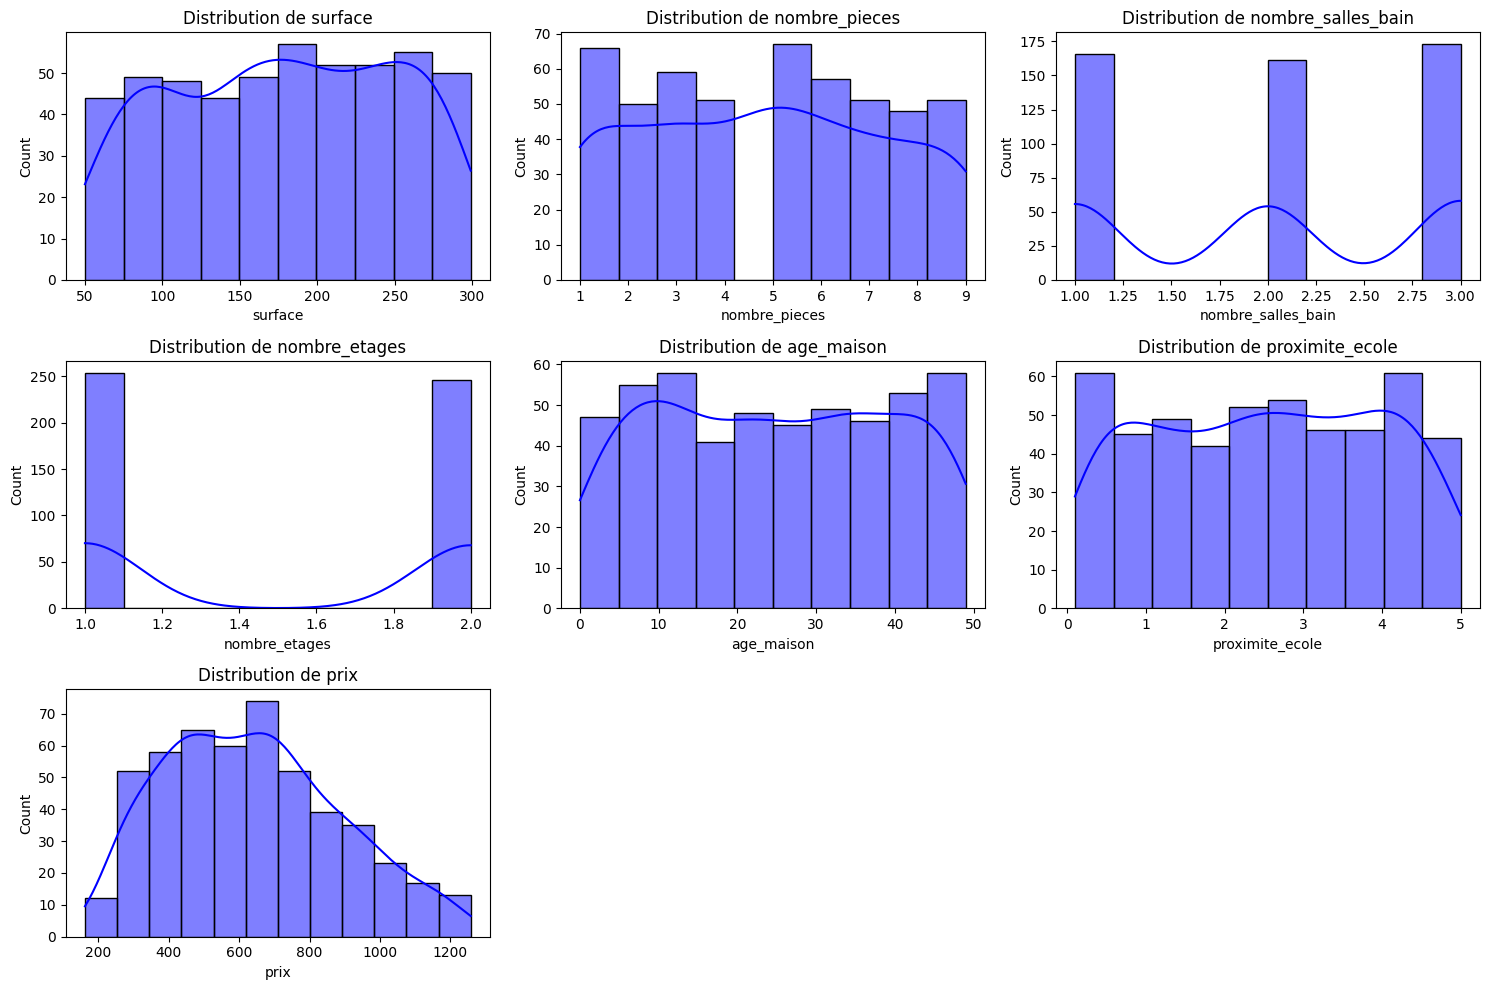

In [4]:
# Importer les bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numériques
num_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Affichage des histogrammes
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

### Explication :

Les histogrammes montrent la distribution des données pour chaque variable. Par exemple, certaines variables comme le prix des maisons semblent avoir une distribution non gaussienne (asymétrique), ce qui peut affecter la performance de certains modèles. L'ajout d'une courbe de densité (KDE) permet de mieux visualiser la forme de la distribution.

## 5. Regrouper les catégories peu représentées

Pour les variables catégorielles, si certaines catégories représentent moins de 3 % des données, nous les regrouperons dans une seule catégorie.

In [5]:
# Vérification des proportions de chaque catégorie pour les variables catégorielles
cat_vars = data.select_dtypes(include=['object']).columns

for col in cat_vars:
    counts = data[col].value_counts(normalize=True) * 100
    print(f"Proportions pour {col}:\n", counts)

    # Regrouper les catégories peu représentées
    other = counts[counts < 3].index
    data[col] = data[col].replace(other, 'Autre')

Proportions pour date:
 date
2021-06-27    0.8
2021-06-30    0.6
2022-05-14    0.6
2021-01-24    0.6
2021-02-11    0.6
             ... 
2021-05-12    0.2
2020-09-27    0.2
2021-05-02    0.2
2022-11-18    0.2
2022-03-08    0.2
Name: proportion, Length: 405, dtype: float64
Proportions pour type_chauffage:
 type_chauffage
Pompe à chaleur    27.8
Central            25.4
Électrique         25.4
Gaz                21.4
Name: proportion, dtype: float64
Proportions pour quartier:
 quartier
Industriel      26.8
Périphérique    26.4
Résidentiel     24.2
Commerçant      22.6
Name: proportion, dtype: float64


### Explication :

Lors de l'analyse des proportions des différentes catégories dans certaines variables, nous avons observé que les dates sont réparties sur plusieurs jours avec des proportions variables. Par exemple, des dates comme le 27 juin 2021 (0,8) ont une représentation plus importante que des dates comme le 8 mars 2022 (0,2). Comme certaines dates sont peu représentées (moins de 3 % des données), il pourrait être pertinent de les regrouper sous une catégorie unique, par exemple "Autres Dates".

De plus, pour les variables catégorielles comme le type de chauffage et le quartier, les distributions sont plus équilibrées, avec quatre catégories principales :

- Type de chauffage : Les différentes catégories sont assez bien représentées :

- - Pompe à chaleur (27,8 %)
- - Central (25,4 %)
- - Électrique (25,4 %)
- - Gaz (21,4 %)

- Quartier : Les catégories de quartier sont également bien réparties :

- - Industriel (26,8 %)
- - Périphérique (26,4 %)
- - Résidentiel (24,2 %)
- - Commerçant (22,6 %)

Dans ce cas, il n’est pas nécessaire de regrouper les catégories, car chaque catégorie a une représentation suffisante.

Conclusion :
- Pour la variable "date" : Il peut être utile de regrouper les dates peu représentées en une seule catégorie "Autres Dates" pour éviter une trop grande dispersion.
- Pour les variables "type_chauffage" et "quartier" : Ces variables sont suffisamment équilibrées, il n'y a donc pas de besoin de regroupement.

Cette étape de regroupement permet de simplifier le traitement des données et de réduire les biais dus à des catégories peu représentées, tout en préservant la richesse des informations importantes.

## 6. Encodage des variables catégorielles

Nous utiliserons l’encodage One-Hot pour transformer les variables catégorielles.

In [6]:
# Encodage One-Hot pour les variables catégorielles
data_encoded = pd.get_dummies(data, columns=cat_vars, drop_first=True)

# Vérification de la forme des données après encodage
print("Forme des données après encodage One-Hot:", data_encoded.shape)

Forme des données après encodage One-Hot: (500, 13)


### Explication :

L'encodage des variables catégorielles a été effectué à l'aide du One-Hot Encoding. Cette méthode permet de convertir les variables catégorielles en colonnes binaires, chaque nouvelle colonne représentant une catégorie différente. Après cet encodage, le jeu de données contient désormais 13 colonnes au lieu des 10 initiales, ce qui représente l’ajout de 3 nouvelles colonnes pour les variables catégorielles.

Ainsi, la forme des données après encodage One-Hot est maintenant de (500, 13), ce qui signifie que nous avons 500 lignes (échantillons) et 13 colonnes (caractéristiques). Cette transformation est essentielle pour que les algorithmes de machine learning puissent comprendre et traiter les variables catégorielles.

## 7. Boîtes à moustaches pour détecter les valeurs extrêmes

Les boîtes à moustaches nous aideront à identifier les valeurs extrêmes pour les variables numériques.

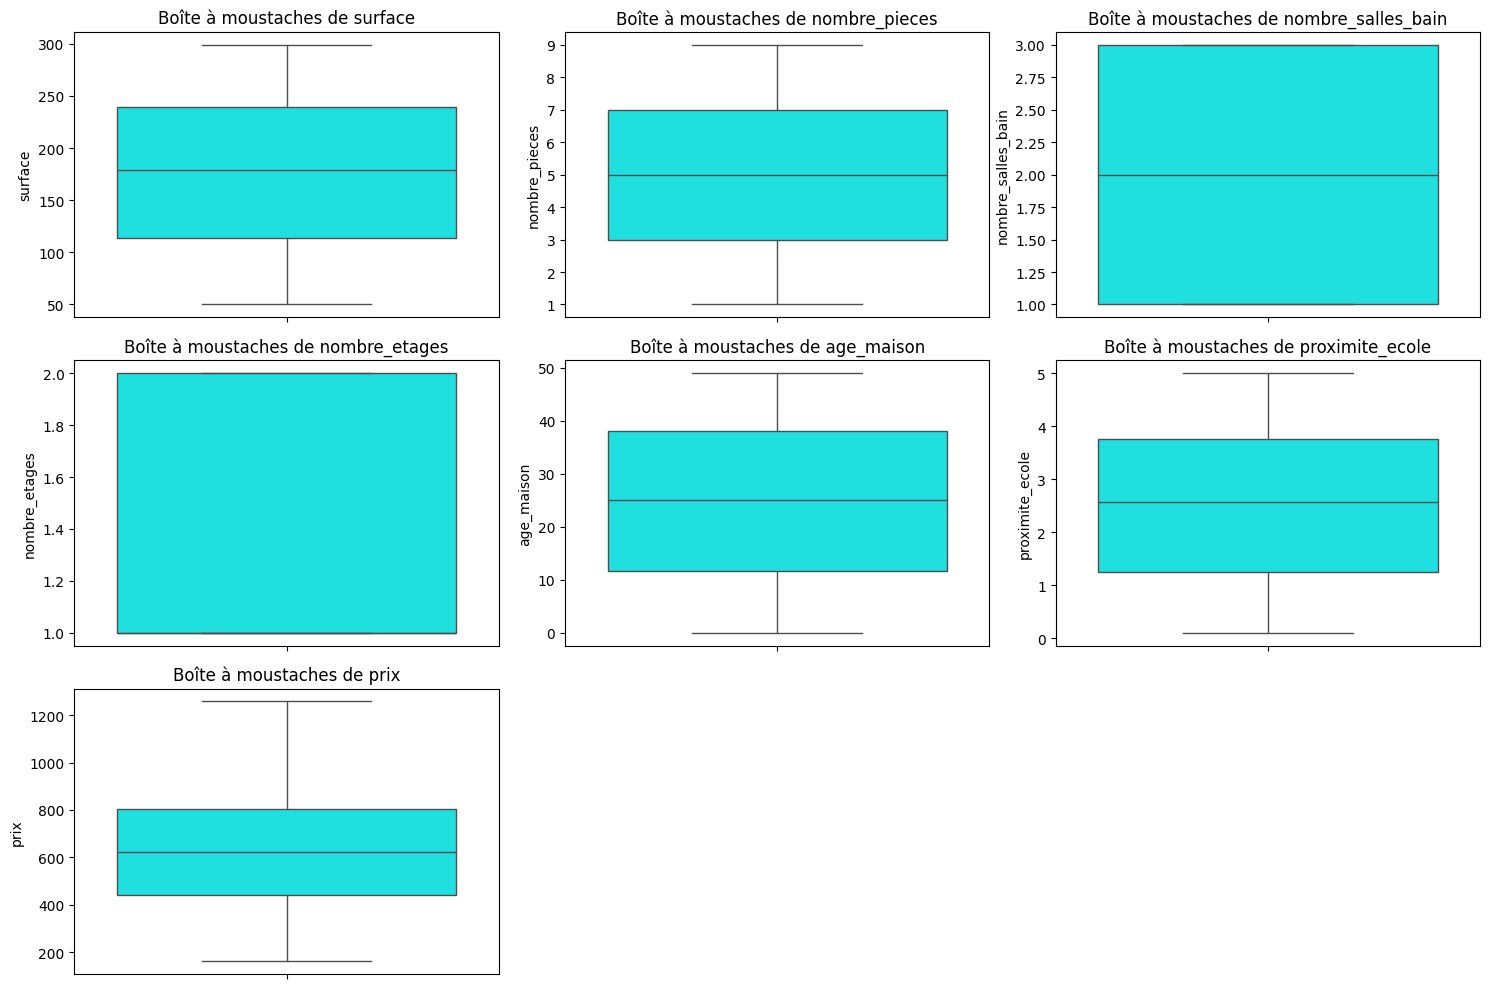

In [7]:
# Affichage des boîtes à moustaches pour les variables numériques
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col], color='cyan')
    plt.title(f'Boîte à moustaches de {col}')
plt.tight_layout()
plt.show()

### Explication :

Les boîtes à moustaches (boxplots) permettent de visualiser la répartition des données et d'identifier les valeurs extrêmes (outliers). Par exemple, certaines maisons avec des prix très élevés ou des superficies anormalement grandes peuvent être des valeurs extrêmes qui doivent être gérées (par exemple, supprimées ou transformées).

## 8. Matrice de corrélation (heatmap)

Nous terminerons par une heatmap pour visualiser les corrélations entre les variables numériques.

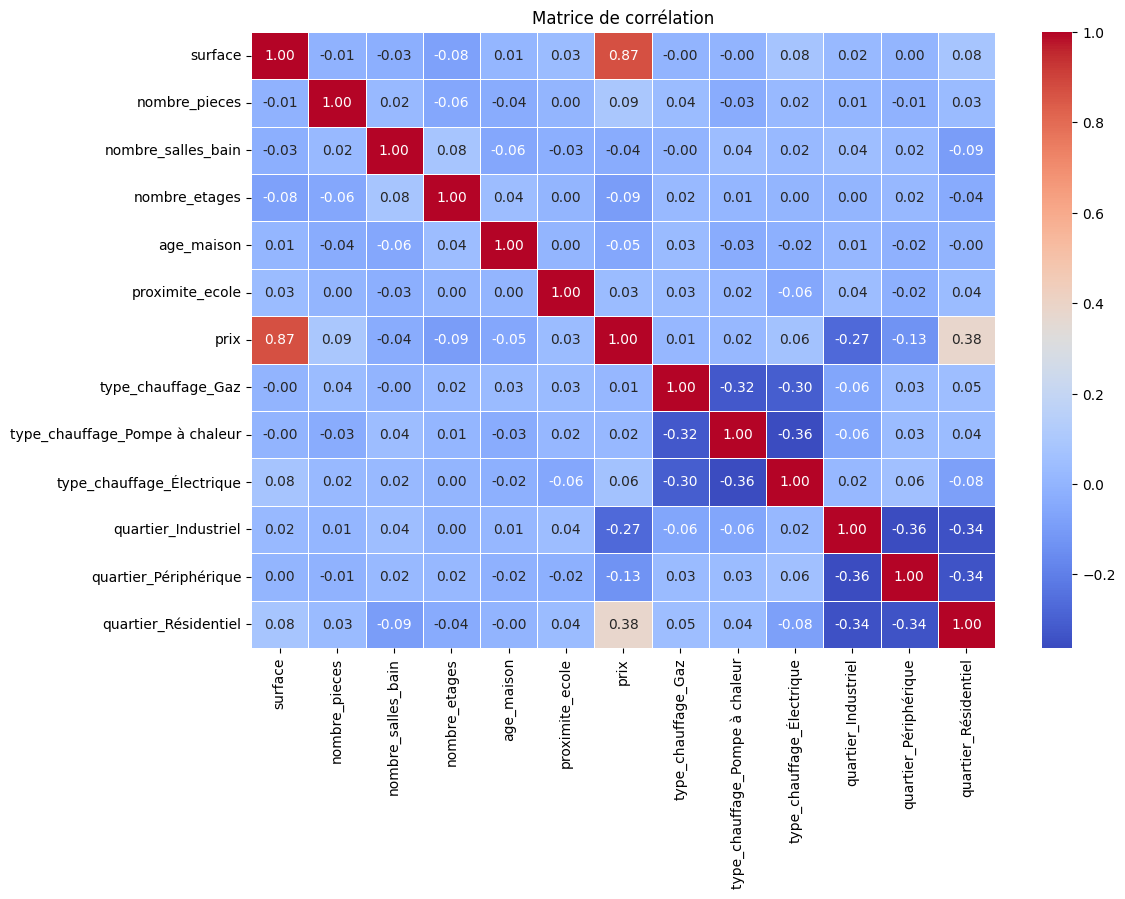

In [8]:
# Calcul de la matrice de corrélation
corr_matrix = data_encoded.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

### Explication :

La heatmap de corrélation montre les relations entre les variables numériques. Certaines variables, comme la superficie ou l'année de construction, sont fortement corrélées avec le prix des maisons, ce qui signifie qu'elles auront probablement un grand impact sur notre modèle. D’autres variables peuvent ne pas être aussi fortement liées, ce qui peut influencer leur importance dans la prédiction.